## Import Library

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import scorer, accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams['figure.figsize'] = [20, 7]

## load dataset

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Time,V1,V2,V3,V4,V5,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,1,1,1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,2,2,2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,3,3,3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,4,4,4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [4]:
data.shape
data.Class.value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [77]:
# separate fraudulent and non fraudulent data
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]

In [78]:
# take only 9000 0's sameple
data_0 = data_0.sample(n=9000)

In [79]:
data = data_1.append(data_0)

data.Class.value_counts()

/var/folders/94/x_h3vf1d7vg3nbb39fj2jf0r0000gn/T/ipykernel_64419/1730244312.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_1.append(data_0)


0    9000
1     492
Name: Class, dtype: int64

In [80]:
# save as csv
data.to_csv('creditcard.csv')

In [81]:
# check the number of 1s and 0s
count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 492
Not Fraudulent "0": 9000
5.466666666666667


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

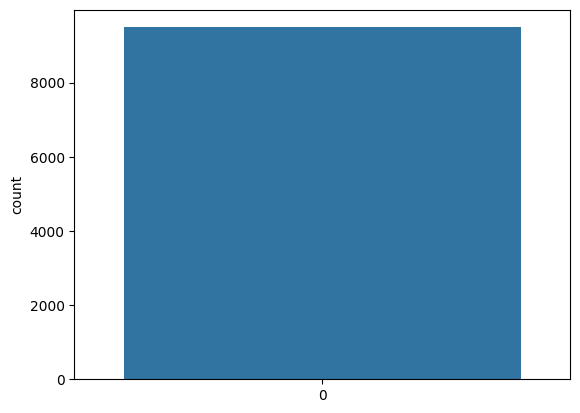

In [82]:
# plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [ ]:
# check for null values
data.isnull().sum()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Respose and Target variable

In [83]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(492, 9000)

## Train test split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Fit the model uing Logitic Regression

In [85]:
# create the object
model =  LogisticRegression()

model.fit(x, y)

y_predict = model.predict(x)

/Users/admin/Projects/credit_card_fraud/credit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
accuracy_score(y_predict, y)

1.0

In [87]:
np.unique(y_predict)

array([0, 1])

## The matrix trap

In [88]:
# import linrary
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)
print('Roc auc scote:', roc_auc_score(xgb_y_predict, y_test))
print('F1 core:',f1_score(xgb_y_predict, y_test))

Accuracy score is: 1.0
Roc auc scote: 1.0
F1 core: 1.0


In [89]:
confusion_matrix(xgb_y_predict, y_test)

array([[1800,    0],
       [   0,   99]])

##  Resampling Technique

In [90]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# divie class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

In [91]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (9000, 34)

class 1: (492, 34)


## 1. Random under sampling

total class of 1 and 0:
 0    492
1    492
Name: Class, dtype: int64


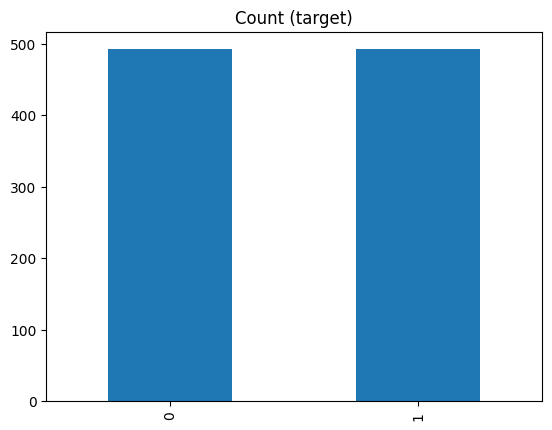

In [92]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## 2. Random over sampling

class count of 1 and 0:
 1    9000
0    9000
Name: Class, dtype: int64


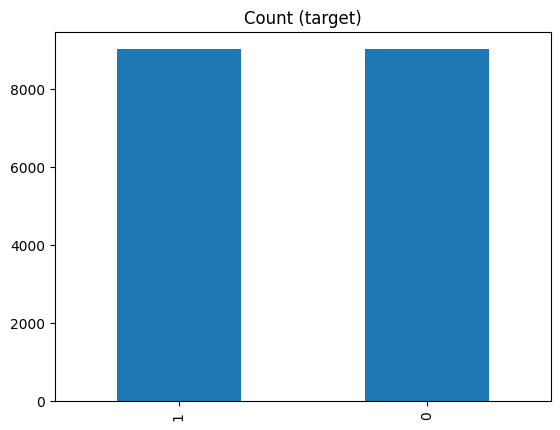

In [93]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Class'].value_counts())

# plot the count
test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Balance data with imbalance learn module

In [94]:
# import library
import sklearn
import imblearn 


## 3. Random under-sampling with imblearn

In [95]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


## 4.Random over-sampling with imblearn

In [96]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9000, 1: 492})
Resample dataset shape Counter({1: 9000, 0: 9000})


## 5. under-sampling Tomek links

In [97]:
# load library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.oversample.fit_resample(x,y)


print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_tl))

AttributeError: 'TomekLinks' object has no attribute 'oversample'

In [98]:
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import TomekLinks

In [99]:
from sklearn.datasets import make_classification

## 6. Synthetic minority over-sampleing technique

In [100]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_sample(x, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

## 7. NearMiss

In [101]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 492, 1: 492})


## 8. Change the performance metric

In [102]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


## 9. penalize algorithm (cost-sensitive training)

In [103]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(x_train, y_train)

svc_predict = svc_model.predict(x_test)

In [104]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.9452777777777778
Accuracy score: 0.8962611901000527
F1 score: 0.5012658227848101


## 10. Tree based algorithm

In [105]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train, y_train)

# predict
rfc_predict = rfc.predict(x_test)

In [106]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


In [110]:
rfc_predict

array([0, 0, 0, ..., 0, 0, 0])

In [108]:
y_train

4716    0
4884    0
5950    0
8523    0
3983    0
       ..
7363    0
9300    0
1502    0
503     0
3735    0
Name: Class, Length: 7593, dtype: int64

In [109]:
x_test

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
8748,5695,1433,126952,78158.0,1.160327,-1.416541,0.978754,-0.330249,-1.638599,0.452144,...,0.226366,0.090156,0.248254,-0.246138,-0.411164,0.478695,-0.075079,0.044783,0.035579,120.00
7970,2739,9347,26933,34314.0,-1.623773,-0.800288,2.632139,1.224768,0.148780,0.141212,...,0.464054,0.413708,0.749614,0.160144,0.203321,0.253061,-0.124117,0.052879,0.105279,118.70
3976,7845,6304,103854,68822.0,-0.310685,1.146024,0.673147,1.017791,-0.362576,-0.821842,...,-0.112985,0.182358,0.390255,-0.000901,0.378285,-0.136017,-0.327143,-0.053600,-0.017405,31.24
8228,3533,1298,14079,25057.0,1.222646,0.548599,-0.005054,1.266393,0.297965,-0.672256,...,-0.209527,-0.114414,-0.001864,-0.111510,0.036830,0.756945,-0.306428,-0.019001,0.002613,8.99
5508,3364,5424,268423,163199.0,-0.501852,1.130585,-0.691944,-0.806746,0.834618,-0.284606,...,0.131179,0.324635,1.173374,-0.060187,0.274649,-0.719956,-0.240001,0.582765,0.418206,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,6556,6712,99755,67266.0,1.261295,-1.486642,0.443586,-1.492442,-1.522909,0.068231,...,-0.235136,-0.271468,-0.705623,0.091964,-0.386851,-0.007802,-0.382938,0.028927,0.025985,104.86
949,6323,499,130591,79387.0,1.235082,0.170224,0.390384,0.432030,-0.280641,-0.483902,...,-0.076749,-0.227531,-0.707250,0.083207,-0.006427,0.224393,0.097698,-0.034901,0.005635,4.49
5888,7787,6775,238973,149900.0,-0.860790,-0.124587,0.909796,-1.252155,-0.773825,-0.550487,...,-0.622380,-0.011356,0.375244,-0.124640,-0.069581,-0.698924,0.634994,-0.048642,0.067132,31.49
6769,2561,694,168820,119400.0,-1.367543,-0.567691,1.977327,-1.118169,0.800083,-0.530428,...,0.493280,0.012114,-0.182791,-0.077342,-0.391381,0.113875,1.176804,-0.243785,-0.134437,65.70


In [37]:
import joblib 

In [38]:
joblib.dump(rfc, "randomForestClassifier")

['randomForestClassifier']

In [111]:
x_test

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
8748,5695,1433,126952,78158.0,1.160327,-1.416541,0.978754,-0.330249,-1.638599,0.452144,...,0.226366,0.090156,0.248254,-0.246138,-0.411164,0.478695,-0.075079,0.044783,0.035579,120.00
7970,2739,9347,26933,34314.0,-1.623773,-0.800288,2.632139,1.224768,0.148780,0.141212,...,0.464054,0.413708,0.749614,0.160144,0.203321,0.253061,-0.124117,0.052879,0.105279,118.70
3976,7845,6304,103854,68822.0,-0.310685,1.146024,0.673147,1.017791,-0.362576,-0.821842,...,-0.112985,0.182358,0.390255,-0.000901,0.378285,-0.136017,-0.327143,-0.053600,-0.017405,31.24
8228,3533,1298,14079,25057.0,1.222646,0.548599,-0.005054,1.266393,0.297965,-0.672256,...,-0.209527,-0.114414,-0.001864,-0.111510,0.036830,0.756945,-0.306428,-0.019001,0.002613,8.99
5508,3364,5424,268423,163199.0,-0.501852,1.130585,-0.691944,-0.806746,0.834618,-0.284606,...,0.131179,0.324635,1.173374,-0.060187,0.274649,-0.719956,-0.240001,0.582765,0.418206,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,6556,6712,99755,67266.0,1.261295,-1.486642,0.443586,-1.492442,-1.522909,0.068231,...,-0.235136,-0.271468,-0.705623,0.091964,-0.386851,-0.007802,-0.382938,0.028927,0.025985,104.86
949,6323,499,130591,79387.0,1.235082,0.170224,0.390384,0.432030,-0.280641,-0.483902,...,-0.076749,-0.227531,-0.707250,0.083207,-0.006427,0.224393,0.097698,-0.034901,0.005635,4.49
5888,7787,6775,238973,149900.0,-0.860790,-0.124587,0.909796,-1.252155,-0.773825,-0.550487,...,-0.622380,-0.011356,0.375244,-0.124640,-0.069581,-0.698924,0.634994,-0.048642,0.067132,31.49
6769,2561,694,168820,119400.0,-1.367543,-0.567691,1.977327,-1.118169,0.800083,-0.530428,...,0.493280,0.012114,-0.182791,-0.077342,-0.391381,0.113875,1.176804,-0.243785,-0.134437,65.70


In [112]:
x_test.head(1).to_json(orient='values')

'[[5695,1433,126952,78158.0,1.1603273003,-1.4165414737,0.9787540328,-0.3302488866,-1.6385989635,0.4521442041,-1.3352283376,0.2449237768,0.7085835456,0.2847758661,-1.9658107777,-0.9927705403,-0.8843604728,-1.0294687348,-0.9277939126,0.933958309,0.5797084416,-1.0006669414,1.2500521354,0.2263662782,0.09015574,0.2482544957,-0.2461375574,-0.4111638485,0.4786954501,-0.0750787656,0.0447831149,0.0355788506,120.0]]'